# Datasciencing unwrapped tip trajectories
Tim Tyree<br>
2.9.2021

In [2]:
from lib.my_initialization import *
from lib import *

- TODO: compute msd for each trajectory
- TODO: compute msd for each trajectory, removing the frames "at birth" and "at death"

- TODO: compute some orientation-blind features
    - ( cosine of angles / signed angles ) between acceleration, velocity, grad(V), and grad(dVdt)
    - speed, change of speed, 
- TODO(later): write a cell describing methods/data schema
- TODO: make umap and/or tsne scatter plot of tip trajectories
- TODO: make gif for spiral tip simulation.  consider outputing returning one image/saving one .png for a given txt call.
- TODO: keep track of an img1 =txt.V-V_thresh and img2={dVdt or lag(img1,2ms).
- TODO: color tips by duration, frame number for ^those visualizations

In [20]:
#save df as csv in care
data_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(data_folder)
data_fn='longest_traj_by_area_lr_pbc.csv'
df_all=pd.read_csv(data_fn)

In [21]:
#TODO: store/load this in a json automatically
#Hint: see methods for param loading from 
# param_fn = 'param_set_8.json'
# param_dir = os.path.join(nb_dir,'lib/model')
# with open(os.path.join(param_dir,param_fn)) as f:
#     param_dict = json.load(f)
K12_index_set={(529, 0, 0): 0,
 (404, 1, 1): 0,
 (613, 0, 0): 0,
 (420, 0, 5): 0,
 (447, 1, 0): 0,
 (360, 1, 8): 0,
 (361, 2, 8): 0,
 (457, 3, 2): 0,
 (472, 2, 1): 0,
 (455, 2, 3): 0,
 (426, 3, 4): 0,
 (489, 3, 3): 0,
 (371, 2, 3): 0,
 (440, 3, 7): 0,
 (544, 3, 2): 0,
 (523, 0, 1): 0,
 (531, 2, 3): 0,
 (306, 1, 7): 0,
 (513, 2, 3): 0,
 (327, 3, 15): 0,
 (353, 1, 12): 0,
 (357, 1, 14): 0,
 (363, 2, 5): 0,
 (592, 2, 3): 0,
 (367, 2, 8): 0,
 (367, 2, 6): 0,
 (364, 2, 5): 0,
 (547, 2, 1): 0,
 (355, 2, 12): 0,
 (452, 1, 3): 0,
 (317, 1, 6): 0,
 (317, 1, 9): 0,
 (346, 3, 3): 0,
 (515, 0, 1): 0,
 (554, 2, 1): 0,
 (534, 1, 0): 0,
 (300, 0, 7): 0,
 (513, 0, 3): 0,
 (392, 0, 8): 0}

# visualize the longest trajectories

In [5]:
#load df 
data_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(data_folder)
data_fn='longest_traj_by_area_lr_pbc.csv'

In [10]:
DS=0.025
#DONE: compute the area for each trial
df=pd.read_csv(data_fn)
df['area']=df.L**2*DS**2#cm^2

In [11]:
#TODO: plot MSD for each trial
d=df[(df.L==513)& (df.txt_id1==0)&(df.txt_id2==3)]
#TODO: detect brownian motion for each trial
#TODO: compute the largest number of repeats of a single trial run

In [12]:
print(f"this spiral tip lasted {d.t.max()-d.t.min()} ms.")

this spiral tip lasted 228.0 ms.


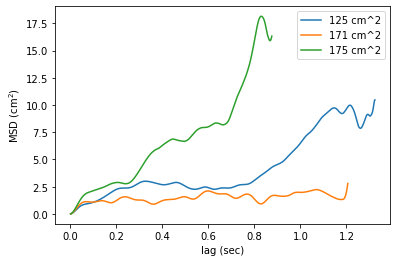

In [14]:
src_lst=['447_1_0',"523_0_1","529_0_0"]
A_lst=[447**2*DS**2,523**2*DS**2,529**2*DS**2]
for A,src in zip(A_lst,src_lst):
    d_in=df[df.src==src]

    DS=0.025#cm per pixel
    DT=2.#ms per frame
    #compute ensemble mean squared displacement
    emsd = trackpy.motion.emsd(d_in, mpp=1., fps=1.,max_lagtime=40000)
    #cast ensemble mean squared displacement into units of cm^2 and seconds
    d_out= pd.DataFrame({'msd':DS**2*emsd.values, 'lagt':emsd.index.values*DT/10**3, 'src':src})


    x_values=d_out.lagt
    y_values=d_out.msd

    plt.plot(x_values,y_values,label=f"{int(np.around(A))} cm^2")
plt.xlabel('lag (sec)')
plt.ylabel(r'MSD (cm$^2$)')
plt.legend()
plt.show()

# create longer spiral tip trajectories for LR model?
- TODO: check untruncated results using full output on UB
- if raising jump_threshold, for example, gives robust 


# TODO(later) visualize features agnostic to orientation

- TODO(option A): use umap according to https://www.r-bloggers.com/2020/11/umap-clustering-in-python/
    - !pip install umap-learn and !pip install datatable
- TODO(option B): use TSNE using sklearn.manifold.tsne
    - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
    - disadvantage: "Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using `init='pca'`)."
- TODO(option C): play with sklearn.manifold in general https://scikit-learn.org/stable/modules/manifold.html#manifold
- TODO(option D): play with `pip install keras-self-attention`

then,
- TODO: use umap to visualize ^those
    - https://www.r-bloggers.com/2020/11/umap-clustering-in-python/


# TODO: compute msd for each trajectory
- TODO: compute msd for each trajectory, removing the frames "at birth" and "at death"

In [18]:
# - TODO: compute msd for each trajectory
retval= diffcoeff_table_gener(ic_suite_fn,trial_folder_name_lst,dict_kwargs_trial,
                              npartitions=2, use_cache_1=False)#, R2_thresh=0.0,duration_thresh=.0, tau_min=0.)
beep(2)
print(f"retval is {retval}")

NameError: name 'diffcoeff_table_gener' is not defined

In [15]:
diffcoeff_table_gener

NameError: name 'diffcoeff_table_gener' is not defined

In [4]:
txt=get_txt(2,2,100,100,nb_dir)
beep(1)

0

In [5]:
txt.shape

(100, 100, 18)

In [6]:
#wait a randomly selected amount of time (10-100 seconds)#UNCOMMENT_HERE
from random import randint
from time import sleep
sleep(randint(10,100))

In [8]:
txt=get_txt(2,1,50,50,nb_dir)

In [10]:
txt.shape
# beep(3)

(50, 50, 18)

# Scrum 2.13.2021

__todo(prereq)__
- merge care_worker's lib with care's lib
- verify that all FK instances of the kwarg, diffcoeff, are effected by user inputs.
- use care_worker's method to launch the following 2 settings

__todo: measure 2 settings__
- D=current, A=double (400x400)
- D=double, A=current (200x200)

todo for param_set_8_og find mean maximum spiral tip lifetime.  is it ~800ms like in the lr model?  if so, why does wj's alteration lead to longer lasting tips? what is the physiological interpretation of wj's alteration?  i.e. what does wj's alteration mean in terms of the local action potential?  what change achieveds the same effect in the LR model? is it shortened APD resulting from high K_o?